In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'mordred2dinputfinal.csv')
df.shape




C:\Users\91830\AppData\Local\Temp\ipykernel_1464\2855231338.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,53,54,55,56,57,58,59,60,61,141,142,150,151,152,153,154,155,156,157,158,168,169,177,178,186,187,195,196,204,205,213,214,222,223,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,267,268,341,342,343,344,345,346,347,348,349,357,358,366,367,368,369,370,371,372,373,374,384,385,393,394,402,403,411,412,420,421,429,430,438,439,447,448,449,450,451,452,453,454,455,456,463,464,471,472,473,474,475,476,477,478,487,488,495,496,503,504,511,512,519,520,527,528,535,536,543,544,545,546,547,548,549,550,551,552,559,560,567,568,569,570,571,572,573,574,583,584,591,592,599,600,607,608,615,616,623,624,631,632,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,70

(1741, 1614)

In [4]:
X = df.drop("class", axis=1)
Y = df["class"]
df.head(10)
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df=df.replace(np.nan, 0)
X = df.drop("class", axis=1)
y = df["class"]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)



In [5]:
from imblearn.combine import SMOTEENN
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train,y_train)
X_test_smenn, y_test_smenn = smenn.fit_resample(X_test,y_test)
counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 1004, 1: 388})
After Counter({1: 783, 0: 547})



Accuracy:  0.9285142086179273

MCC: 0.8585500922249623

Sensitivity:  0.9502487562189055

Specificity:  0.9067796610169492

Recall:  0.9502487562189055

Precision:  0.9455445544554455

Area under the ROC curve:  0.9285142086179273

F1 score:  0.9478908188585607


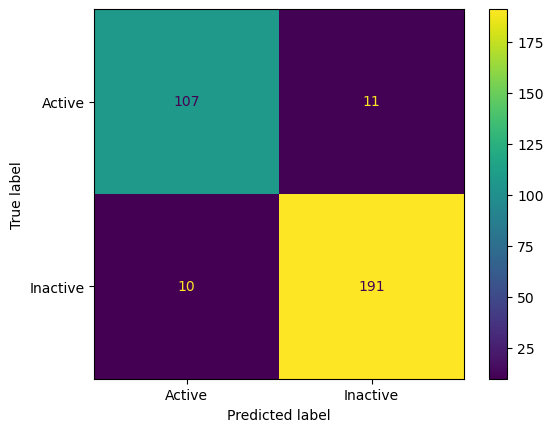

In [7]:
import xgboost as xgb
from xgboost import XGBClassifier
#XGBoost classifer 

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=500)
xgb_model.fit(X_train_smenn, y_train_smenn)

y_predxgb = xgb_model.predict(X_test_smenn)

#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, y_predxgb).ravel()
MCC = matthews_corrcoef(y_test_smenn, y_predxgb)
accuracy = balanced_accuracy_score(y_test_smenn, y_predxgb)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, y_predxgb)
precision = precision_score(y_test_smenn, y_predxgb)
roc_auc = roc_auc_score(y_test_smenn, y_predxgb)
f1 = f1_score(y_test_smenn, y_predxgb)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)
#confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, y_predxgb)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()


In [8]:
df2 = pd.read_csv(r'mordred2D_PubChem_phytochemicals.csv')
df2.shape
df2=df2.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df2=df2.replace(np.nan, 0)



C:\Users\91830\AppData\Local\Temp\ipykernel_1464\1893060306.py:1: DtypeWarning: Columns (136,137,138,139,140,141,142,143,145,146,147,148,149,150,151,152,163,164,165,166,167,168,169,170,172,173,174,175,176,177,178,179,181,182,183,184,185,186,187,188,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,206,208,209,210,211,212,213,214,215,217,218,219,220,221,222,223,224,226,227,228,229,230,231,232,233,343,344,345,346,347,348,349,350,352,353,354,355,356,357,358,359,361,362,363,364,365,366,367,368,379,380,381,382,383,384,385,386,388,389,390,391,392,393,394,395,397,398,399,400,401,402,403,404,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,422,424,425,426,427,428,429,430,431,433,434,435,436,437,438,439,440,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517

In [9]:
X_unseen = df2
prediction=xgb_model.predict(X_unseen)
print(prediction)

ValueError: Feature shape mismatch, expected: 1613, got 1614

In [13]:
res = pd.DataFrame(prediction)
res.columns = ["prediction"]
res.to_csv("clfprediction_results.csv")